In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Membaca CSV file
file_path = '/content/drive/MyDrive/KM 2023 - RevoU/Cycle 1 - Data Analytics/hotel_bookings_cleaned.csv'
df_csv = pd.read_csv(file_path)

# Menampilkan DataFrame
df = df_csv.drop(columns='ID')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,combine_arrival_date,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_room_type_same
0,Resort Hotel,0,342,2015,July,27,1,01/07/2015,0,1,...,No Deposit,NaN,0,Transient,"$0,00",0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,01/07/2015,0,0,...,No Deposit,NaN,0,Transient,"$0,00",0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,01/07/2015,0,1,...,No Deposit,NaN,0,Transient,"$75,00",0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,01/07/2015,0,1,...,No Deposit,304.0,0,Transient,"$75,00",0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,01/07/2015,0,2,...,No Deposit,240.0,0,Transient,"$98,00",0,1,Check-Out,2015-07-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86152,City Hotel,0,23,2017,August,35,30,30/08/2017,2,5,...,No Deposit,394.0,0,Transient,"$96,14",0,0,Check-Out,2017-08-15,1
86153,City Hotel,0,102,2017,August,35,31,31/08/2017,2,5,...,No Deposit,9.0,0,Transient,"$225,43",0,1,Check-Out,2017-08-15,1
86154,City Hotel,0,34,2017,August,35,31,31/08/2017,2,5,...,No Deposit,9.0,0,Transient,"$157,71",0,0,Check-Out,2017-08-15,1
86155,City Hotel,0,109,2017,August,35,31,31/08/2017,2,5,...,No Deposit,89.0,0,Transient,"$104,40",0,0,Check-Out,2017-08-15,1


In [ ]:
df_parameter = df[['is_canceled','adr','is_room_type_same','distribution_channel','market_segment','customer_type','lead_time','booking_changes']]
df_parameter

,is_canceled,adr,is_room_type_same,distribution_channel,market_segment,customer_type,lead_time,booking_changes
0,0,"$0,00",0,Direct,Direct,Transient,342,3
1,0,"$0,00",1,Direct,Direct,Transient,737,4
2,0,"$75,00",1,Direct,Direct,Transient,7,0
3,0,"$75,00",0,Corporate,Corporate,Transient,13,0
4,0,"$98,00",1,TA/TO,Online TA,Transient,14,0
...,...,...,...,...,...,...,...,...
86152,0,"$96,14",1,TA/TO,Offline TA/TO,Transient,23,0
86153,0,"$225,43",1,TA/TO,Online TA,Transient,102,0
86154,0,"$157,71",1,TA/TO,Online TA,Transient,34,0
86155,0,"$104,40",1,TA/TO,Online TA,Transient,109,0


In [ ]:
df_parameter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86157 entries, 0 to 86156
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   is_canceled           86157 non-null  int64 
 1   adr                   86157 non-null  object
 2   is_room_type_same     86157 non-null  int64 
 3   distribution_channel  86157 non-null  object
 4   market_segment        86157 non-null  object
 5   customer_type         86157 non-null  object
 6   lead_time             86157 non-null  int64 
 7   booking_changes       86157 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.3+ MB


# Correlation

In [ ]:
# Mengubah dollar menjadi float
new_df = df_parameter.copy()
new_df['adr'] = new_df['adr'].replace('[\$,]', '', regex=True).astype(int)/100
new_df

,is_canceled,adr,is_room_type_same,distribution_channel,market_segment,customer_type,lead_time,booking_changes
0,0,0.00,0,Direct,Direct,Transient,342,3
1,0,0.00,1,Direct,Direct,Transient,737,4
2,0,75.00,1,Direct,Direct,Transient,7,0
3,0,75.00,0,Corporate,Corporate,Transient,13,0
4,0,98.00,1,TA/TO,Online TA,Transient,14,0
...,...,...,...,...,...,...,...,...
86152,0,96.14,1,TA/TO,Offline TA/TO,Transient,23,0
86153,0,225.43,1,TA/TO,Online TA,Transient,102,0
86154,0,157.71,1,TA/TO,Online TA,Transient,34,0
86155,0,104.40,1,TA/TO,Online TA,Transient,109,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encode_df = new_df.copy()

# Melakukan Label Encoding pada setiap parameter kategorikal
for col in ['distribution_channel',	'market_segment',	'customer_type']:
    encode_df[col] = label_encoder.fit_transform(encode_df[col])

encode_df

,is_canceled,adr,is_room_type_same,distribution_channel,market_segment,customer_type,lead_time,booking_changes
0,0,0.00,0,1,3,2,342,3
1,0,0.00,1,1,3,2,737,4
2,0,75.00,1,1,3,2,7,0
3,0,75.00,0,0,2,2,13,0
4,0,98.00,1,3,6,2,14,0
...,...,...,...,...,...,...,...,...
86152,0,96.14,1,3,5,2,23,0
86153,0,225.43,1,3,6,2,102,0
86154,0,157.71,1,3,6,2,34,0
86155,0,104.40,1,3,6,2,109,0


In [ ]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86157 entries, 0 to 86156
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_canceled           86157 non-null  int64  
 1   adr                   86157 non-null  float64
 2   is_room_type_same     86157 non-null  int64  
 3   distribution_channel  86157 non-null  int64  
 4   market_segment        86157 non-null  int64  
 5   customer_type         86157 non-null  int64  
 6   lead_time             86157 non-null  int64  
 7   booking_changes       86157 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.3 MB


In [ ]:
# Mencari apakah parameter saling berkaitan dan memengaruhi tingkat pembatalan
correlation_matrix = encode_df.corr()['is_canceled']
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)

sorted_correlation

is_canceled             1.000000
lead_time               0.197566
is_room_type_same       0.156716
market_segment          0.136503
distribution_channel    0.112918
booking_changes         0.058252
adr                     0.027540
customer_type           0.015508
Name: is_canceled, dtype: float64

In [ ]:
new_df = df[['is_canceled','hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'combine_arrival_date', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'is_repeated_guest', 'previous_bookings_not_canceled', 'deposit_type', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date','is_room_type_same']]
new_df

,is_canceled,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,combine_arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_bookings_not_canceled,deposit_type,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_room_type_same
0,0,Resort Hotel,2015,July,27,1,01/07/2015,0,1,2,...,0,0,No Deposit,NaN,0,0,0,Check-Out,2015-07-01,0
1,0,Resort Hotel,2015,July,27,1,01/07/2015,0,0,2,...,0,0,No Deposit,NaN,0,0,0,Check-Out,2015-07-01,1
2,0,Resort Hotel,2015,July,27,1,01/07/2015,0,1,1,...,0,0,No Deposit,NaN,0,0,0,Check-Out,2015-07-02,1
3,0,Resort Hotel,2015,July,27,1,01/07/2015,0,1,1,...,0,0,No Deposit,304.0,0,0,0,Check-Out,2015-07-02,0
4,0,Resort Hotel,2015,July,27,1,01/07/2015,0,2,2,...,0,0,No Deposit,240.0,0,0,1,Check-Out,2015-07-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86152,0,City Hotel,2017,August,35,30,30/08/2017,2,5,2,...,0,0,No Deposit,394.0,0,0,0,Check-Out,2017-08-15,1
86153,0,City Hotel,2017,August,35,31,31/08/2017,2,5,3,...,0,0,No Deposit,9.0,0,0,1,Check-Out,2017-08-15,1
86154,0,City Hotel,2017,August,35,31,31/08/2017,2,5,2,...,0,0,No Deposit,9.0,0,0,0,Check-Out,2017-08-15,1
86155,0,City Hotel,2017,August,35,31,31/08/2017,2,5,2,...,0,0,No Deposit,89.0,0,0,0,Check-Out,2017-08-15,1


In [ ]:
label_encoder = LabelEncoder()
encode_df_new = new_df.copy()

# Melakukan Label Encoding pada setiap parameter kategorikal
for col in ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'is_repeated_guest', 'previous_bookings_not_canceled', 'deposit_type', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']:
    encode_df_new[col] = label_encoder.fit_transform(encode_df_new[col])

encode_df_new

,is_canceled,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,combine_arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_bookings_not_canceled,deposit_type,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_room_type_same
0,0,1,2015,5,27,1,01/07/2015,0,1,2,...,0,0,0,333,0,0,0,1,2015-07-01,0
1,0,1,2015,5,27,1,01/07/2015,0,0,2,...,0,0,0,333,0,0,0,1,2015-07-01,1
2,0,1,2015,5,27,1,01/07/2015,0,1,1,...,0,0,0,333,0,0,0,1,2015-07-02,1
3,0,1,2015,5,27,1,01/07/2015,0,1,1,...,0,0,0,220,0,0,0,1,2015-07-02,0
4,0,1,2015,5,27,1,01/07/2015,0,2,2,...,0,0,0,173,0,0,1,1,2015-07-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86152,0,0,2017,1,35,30,30/08/2017,2,5,2,...,0,0,0,271,0,0,0,1,2017-08-15,1
86153,0,0,2017,1,35,31,31/08/2017,2,5,3,...,0,0,0,8,0,0,1,1,2017-08-15,1
86154,0,0,2017,1,35,31,31/08/2017,2,5,2,...,0,0,0,8,0,0,0,1,2017-08-15,1
86155,0,0,2017,1,35,31,31/08/2017,2,5,2,...,0,0,0,77,0,0,0,1,2017-08-15,1


In [ ]:
# Mengecek parameter lain yang dapat memengaruhi tingkat pembatalan
correlation_matrix = encode_df_new.corr()['is_canceled']
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)

sorted_correlation

<ipython-input-450-312690a2ccfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encode_df_new.corr()['is_canceled']


is_canceled                       1.000000
reservation_status                0.909889
required_car_parking_spaces       0.185999
is_room_type_same                 0.156716
total_of_special_requests         0.118891
deposit_type                      0.112077
agent                             0.108751
arrival_date_year                 0.077874
stays_in_week_nights              0.076570
hotel                             0.070296
adults                            0.064722
is_repeated_guest                 0.063208
children                          0.053396
stays_in_weekend_nights           0.053186
meal                              0.043453
country                           0.042829
arrival_date_month                0.032994
days_in_waiting_list              0.032839
babies                            0.023507
arrival_date_week_number          0.012912
previous_bookings_not_canceled    0.010428
arrival_date_day_of_month         0.002559
Name: is_canceled, dtype: float64

**Keseluruhan parameter yang memiliki korelasi tertinggi terhadap pembatalan**


*   arrival_date_year
*   requeired_car_parking_spaces
*   lead_time
*   market_segment
*   distribution_channel
*   agent
*   deposity_type
*   total_of_special_requests
*   is_repeated_guest

Berdasarkan data korelasi yang diperoleh, seharusnya terdapat **reservation_status** yang memiliki tingkat korelasi cukup tinggi namun hal ini **tidak bersifat eksploratif** karena dependen dengan is_canceled, dimana status akan berubah bergantung pada proses pembatalan booking terlebih dahulu.









# Analysis

#### Average Daily Rate (ADR)

In [ ]:
# Kerugian pendapatan yang diperoleh apabila dibatalkan
canceled_bookings = encode_df[encode_df['is_canceled'] == 1].copy()
canceled_bookings_new = encode_df_new[encode_df_new['is_canceled'] == 1].copy()
canceled_bookings['revenue_loss'] = canceled_bookings['adr'] * (canceled_bookings_new['stays_in_weekend_nights'] + canceled_bookings_new['stays_in_week_nights'])
total_revenue_loss = canceled_bookings['revenue_loss'].sum()

print(f'Total Revenue Loss: ${total_revenue_loss:.2f}')


Total Revenue Loss: $25094450.66


In [ ]:
# Pendapatan yang diperoleh pada pesanan yang tidak dibatalkan
uncanceled_bookings = encode_df[encode_df['is_canceled'] == 0].copy()
uncanceled_bookings_new = encode_df_new[encode_df_new['is_canceled'] == 0].copy()
uncanceled_bookings['revenue'] = uncanceled_bookings['adr'] * (uncanceled_bookings_new['stays_in_weekend_nights'] + uncanceled_bookings_new['stays_in_week_nights'])
total_revenue = uncanceled_bookings['revenue'].sum()

print(f'Total Revenue: ${total_revenue:.2f}')


Total Revenue: $25479851.97


In [ ]:
# Persentase kerugian yang diperoleh
revenue_loss_percentage = total_revenue_loss/(total_revenue_loss+total_revenue)*100
print(f'Revenue Loss Percentage: {revenue_loss_percentage:.2f}%')

Revenue Loss Percentage: 49.62%


#### Reserved Room Type and Assigned Room Type

Pada informasi diatas, ditemukan bahwa **Persentase Kerugian Pendapatan** yang diperoleh akibat pembatalan kamar **sebesar 49,62%**

In [ ]:
# Banyak pembatalan akibat perbedaan tipe kamar yang dipesan dan diberikan
canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1].copy()
mismatched_room = canceled_bookings['is_room_type_same']
mismatched_room.value_counts()

1    22345
0     1416
Name: is_room_type_same, dtype: int64

In [ ]:
# Persentase pembatalan akibat ketidaksesuaian tipe kamar

cancellation_rate = mismatched_room.value_counts().min()/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 1.64%


is_room_type_same
0    10.930143
1    30.525122
Name: is_canceled, dtype: float64


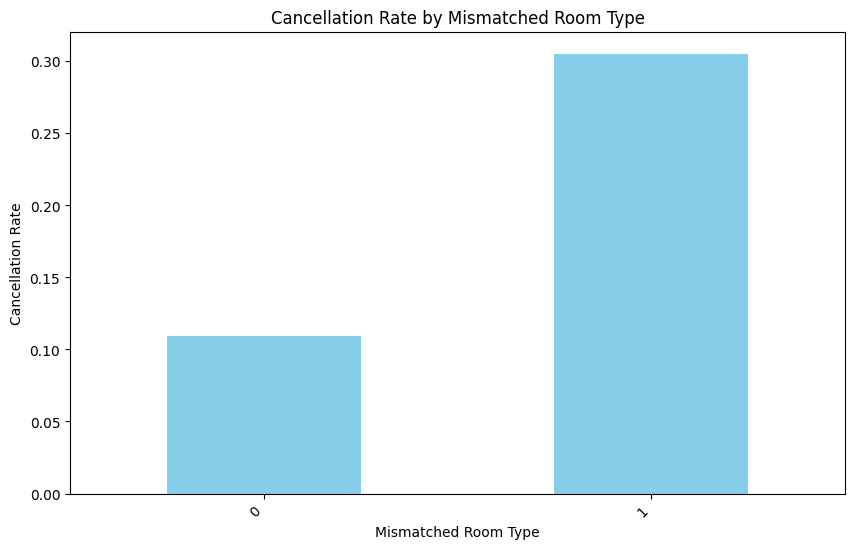

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

all_bookings = df_parameter[['is_canceled', 'is_room_type_same']].copy()
canceled_by_type = canceled_bookings.groupby('is_room_type_same')['is_canceled'].sum()
total_by_type = all_bookings.groupby('is_room_type_same')['is_canceled'].count()
cancellation_rate_by_type = canceled_by_type / total_by_type
print(cancellation_rate_by_type*100)

# Plotting the cancellation rate
plt.figure(figsize=(10, 6))
cancellation_rate_by_type.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Mismatched Room Type')
plt.xlabel('Mismatched Room Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Total Cancellation Rate sebelum improvement
canceled_bookings = (encode_df[encode_df['is_canceled'] == 1]['is_canceled'].count())
total_cancellation_rate = canceled_bookings/encode_df['is_canceled'].count()*100

print(f'Cancellation Rate Before Improvement: {total_cancellation_rate:.2f}%')

Cancellation Rate Before Improvement: 27.58%


In [ ]:
# Total Cancellation Rate setelah improvement
import math

canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
canceled_mismatched_room = math.ceil(mismatched_room.value_counts().min())
total_canceled_bookings = canceled_bookings - canceled_mismatched_room
total_cancellation_rate_room_type = total_canceled_bookings/(df_parameter['is_canceled'].count() + canceled_mismatched_room)*100

print(f'Cancellation Rate After Improvement: {total_cancellation_rate_room_type:.2f}%')

Cancellation Rate After Improvement: 25.52%


Pada informasi diatas, ditemukan bahwa **Cancellation Rate** yang dipengaruhi oleh pembatalan kamar akibat ketidaksesuaian kamar yang dipesan dengan yang diberikan **sebesar 1,64%**.

Apabila dilakukan peningkatan dari segi kesesuaian tipe kamar, maka akan terdapat **peningkatan pada Total Cancellation Rate** yang sebelumnya 27.58% **menurun menjadi 25.52%**.

#### Distribution Channel

In [ ]:
# Banyak pembatalan dari segi distribution channel
canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1].copy()
distribution_channel_book = canceled_bookings['distribution_channel']
distribution_channel_book.value_counts()

TA/TO        20605
Direct        2212
Corporate      911
GDS             32
Undefined        1
Name: distribution_channel, dtype: int64

In [ ]:
# Persentase pembatalan dari segi distribution channel

cancellation_rate = distribution_channel_book.value_counts().max()/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 23.92%


distribution_channel
Corporate    0.181077
Direct       0.171846
GDS          0.180791
TA/TO        0.302694
Undefined    0.200000
Name: is_canceled, dtype: float64


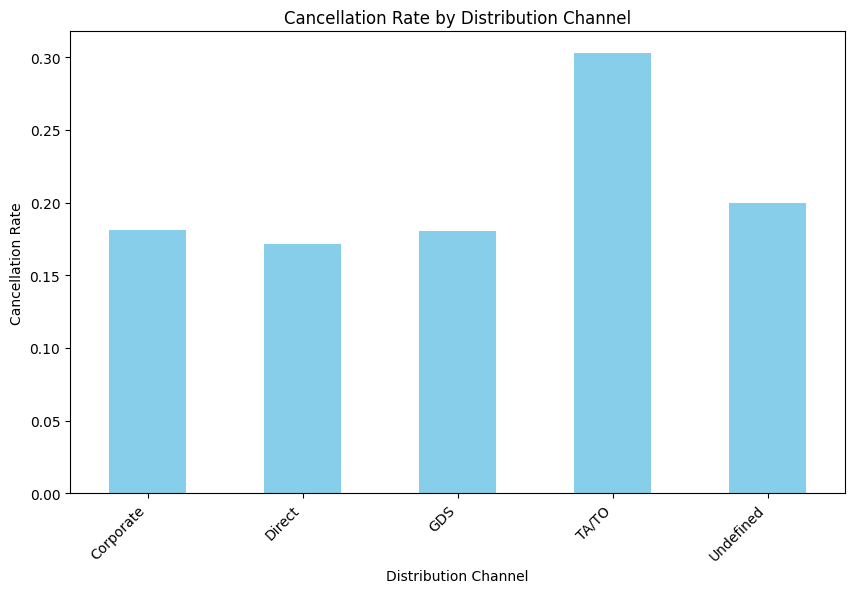

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

all_bookings = df_parameter[['is_canceled', 'distribution_channel']].copy()
canceled_by_channel = canceled_bookings.groupby('distribution_channel')['is_canceled'].sum()
total_by_channel = all_bookings.groupby('distribution_channel')['is_canceled'].count()
cancellation_rate_by_channel = canceled_by_channel / total_by_channel
print(cancellation_rate_by_channel)

# Plotting the cancellation rate
plt.figure(figsize=(10, 6))
cancellation_rate_by_channel.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Total Cancellation Rate sebelum improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_cancellation_rate = canceled_bookings/df_parameter['is_canceled'].count()*100

print(f'Cancellation Rate Before Improvement: {total_cancellation_rate:.2f}%')

Cancellation Rate Before Improvement: 27.58%


In [ ]:
import math

# Total Cancellation Rate setelah improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
canceled_distribution_channel_book = math.ceil(0.25 * distribution_channel_book.value_counts().max())
total_canceled_bookings = canceled_bookings - canceled_distribution_channel_book
total_cancellation_rate_distribution_channel = total_canceled_bookings/(df_parameter['is_canceled'].count() + canceled_distribution_channel_book)*100

print(f'Cancellation Rate After Improvement: {total_cancellation_rate_distribution_channel:.2f}%')

Cancellation Rate After Improvement: 20.38%


Pada informasi diatas, ditemukan bahwa **Cancellation Rate** yang dipengaruhi oleh distribution channel TA/TO **sebesar 23,92%**.

Apabila dilakukan minimalisasi pembatalan terhadap TA/TO dengan asumsi maksimal transaksi sebesar 25%, maka akan terdapat **peningkatan pada Total Cancellation Rate** yang sebelumnya 27.58% **menurun menjadi 20.38%**.

#### Market Segmentation

In [ ]:
# Banyak pembatalan dari segi market segment
canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1].copy()
market_segment_book = canceled_bookings['market_segment']
market_segment_book.value_counts()

Online TA        17209
Offline TA/TO     2294
Direct            1860
Groups            1417
Corporate          763
Complementary      185
Aviation            33
Name: market_segment, dtype: int64

In [ ]:
# Persentase pembatalan dari segi market segment

cancellation_rate = market_segment_book.value_counts().max()/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 19.97%


market_segment
Aviation         14.537445
Complementary    26.618705
Corporate        18.271073
Direct           15.871661
Groups           30.123299
Offline TA/TO    16.927391
Online TA        33.688971
Undefined              NaN
Name: is_canceled, dtype: float64


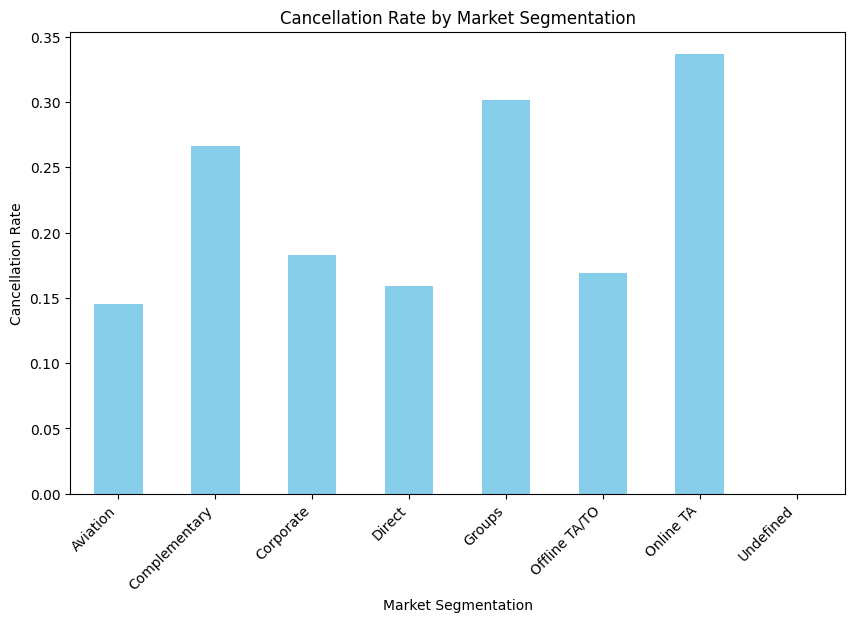

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

all_bookings = df_parameter[['is_canceled', 'market_segment']].copy()
canceled_by_market = canceled_bookings.groupby('market_segment')['is_canceled'].sum()
total_by_market = all_bookings.groupby('market_segment')['is_canceled'].count()
cancellation_rate_by_market = canceled_by_market / total_by_market
print(cancellation_rate_by_market*100)

# Plotting the cancellation rate
plt.figure(figsize=(10, 6))
cancellation_rate_by_market.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Market Segmentation')
plt.xlabel('Market Segmentation')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Total Cancellation Rate sebelum improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_cancellation_rate = canceled_bookings/df_parameter['is_canceled'].count()*100

print(f'Cancellation Rate Before Improvement: {total_cancellation_rate:.2f}%')

Cancellation Rate Before Improvement: 27.58%


In [ ]:
import math

# Total Cancellation Rate setelah improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
canceled_market_segment_book = math.ceil(0.25 * market_segment_book.value_counts().max())
total_canceled_bookings = canceled_bookings - canceled_market_segment_book
total_cancellation_rate_market = total_canceled_bookings/(df_parameter['is_canceled'].count() + canceled_market_segment_book)*100

print(f'Cancellation Rate After Improvement: {total_cancellation_rate_market:.2f}%')

Cancellation Rate After Improvement: 21.51%


Pada informasi diatas, ditemukan bahwa **Cancellation Rate** yang dipengaruhi oleh market segment online TA/TO **sebesar 19,97%**.

Apabila dilakukan minimalisasi pembatalan terhadap online TA/TO dengan asumsi maksimal transaksi sebesar 5%, maka akan terdapat **peningkatan pada Total Cancellation Rate** yang sebelumnya 27.58% **menurun menjadi 21.51%**.

#### Customer Type

In [ ]:
# Banyak pembatalan dari segi customer type
canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1].copy()
customer_type_book = canceled_bookings['customer_type']
customer_type_book.value_counts()

Transient          20997
Transient-Party     2123
Contract             567
Group                 74
Name: customer_type, dtype: int64

In [ ]:
# Persentase pembatalan dari segi customer type

cancellation_rate = customer_type_book.value_counts().max()/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 24.37%


customer_type
Contract           18.219794
Group              13.754647
Transient          29.455005
Transient-Party    18.918196
Name: is_canceled, dtype: float64


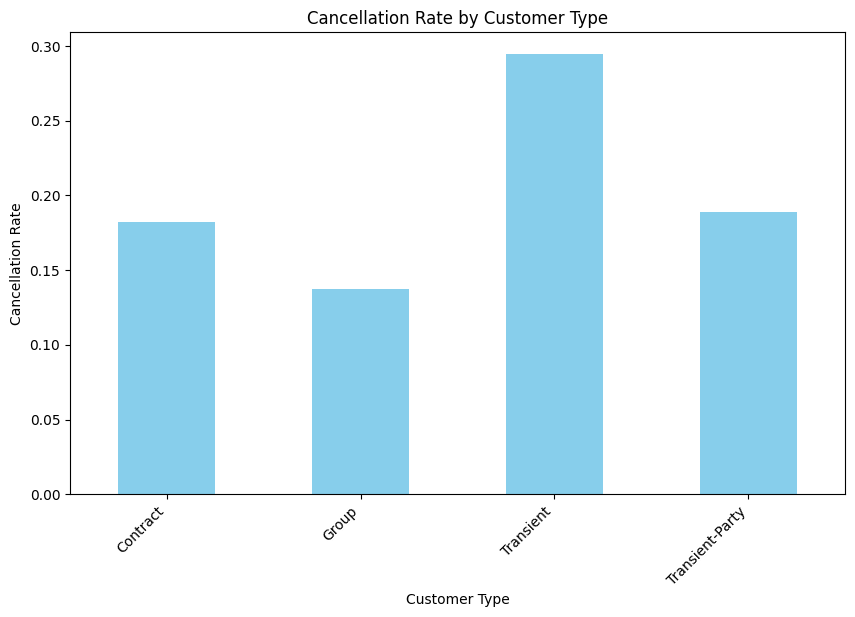

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

all_bookings = df_parameter[['is_canceled', 'customer_type']].copy()
canceled_by_cust = canceled_bookings.groupby('customer_type')['is_canceled'].sum()
total_by_cust = all_bookings.groupby('customer_type')['is_canceled'].count()
cancellation_rate_by_cust = canceled_by_cust / total_by_cust
print(cancellation_rate_by_cust*100)

# Plotting the cancellation rate
plt.figure(figsize=(10, 6))
cancellation_rate_by_cust.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Total Cancellation Rate sebelum improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_cancellation_rate = canceled_bookings/df_parameter['is_canceled'].count()*100

print(f'Cancellation Rate Before Improvement: {total_cancellation_rate:.2f}%')

Cancellation Rate Before Improvement: 27.58%


In [ ]:
import math

# Total Cancellation Rate setelah improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
canceled_customer_type_book = math.ceil(0.25 * customer_type_book.value_counts().max())
total_canceled_bookings = canceled_bookings - canceled_customer_type_book
total_cancellation_rate_customer_type = total_canceled_bookings/(df_parameter['is_canceled'].count() + canceled_customer_type_book)*100

print(f'Cancellation Rate After Improvement: {total_cancellation_rate_customer_type:.2f}%')

Cancellation Rate After Improvement: 20.25%


Pada informasi diatas, ditemukan bahwa **Cancellation Rate** yang dipengaruhi oleh customer type Transient **sebesar 24,37%**.

Apabila dilakukan minimalisasi pembatalan terhadap customer individu atau keluarga yang  dengan asumsi maksimal transaksi sebesar 5%, maka akan terdapat **peningkatan pada Total Cancellation Rate** yang sebelumnya 20.25% **menurun menjadi 26.36%**.

#### Lead Time

In [ ]:
# Banyak pembatalan akibat lead time

canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1].copy()
lead_time_book = canceled_bookings['lead_time']
lead_time_book.value_counts()

0      711
1      331
2      237
3      236
12     215
      ... 
362      1
467      1
471      1
493      1
387      1
Name: lead_time, Length: 471, dtype: int64

In [ ]:
# Persentase pembatalan dari segi lead time

cancellation_rate = lead_time_book.value_counts().max()/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 0.83%


lead_time_range
(0, 200]      0.268098
(200, 400]    0.437318
(400, 600]    0.523490
(600, 800]    0.928571
Name: is_canceled, dtype: float64


<ipython-input-476-52da52821324>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parameter['lead_time_range'] = pd.cut(df_parameter['lead_time'], bins=lead_time_bins)


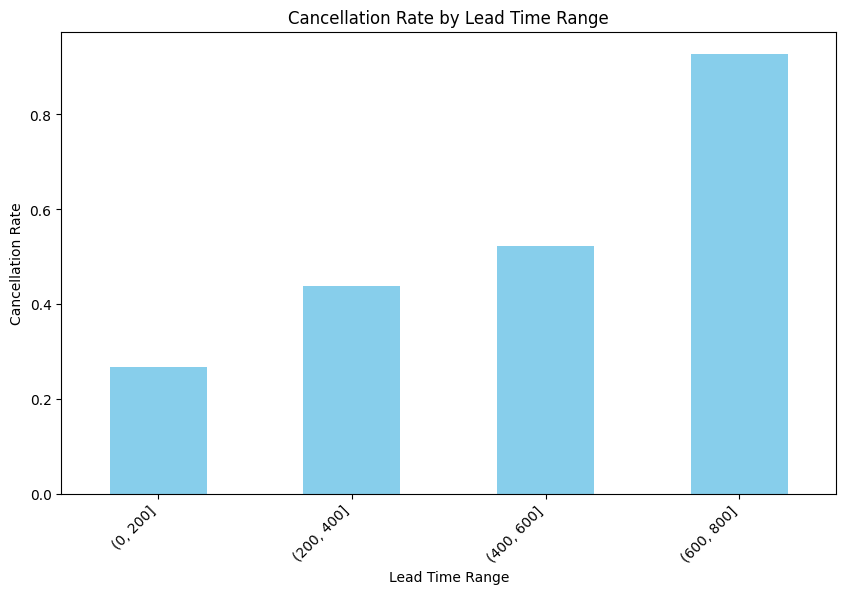

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung cancellation rate berdasarkan range lead time
lead_time_bins = [0, 200, 400, 600, 800]
df_parameter['lead_time_range'] = pd.cut(df_parameter['lead_time'], bins=lead_time_bins)

all_bookings = df_parameter[['is_canceled', 'lead_time_range']].copy()
canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1]
canceled_by_lead_time = canceled_bookings.groupby('lead_time_range')['is_canceled'].sum()
total_by_lead_time = all_bookings.groupby('lead_time_range')['is_canceled'].count()
cancellation_rate_by_lead_time = canceled_by_lead_time / total_by_lead_time
print(cancellation_rate_by_lead_time)

# Plotting the cancellation rate
plt.figure(figsize=(10, 6))
cancellation_rate_by_lead_time.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Lead Time Range')
plt.xlabel('Lead Time Range')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

Kasus **pembatalan transaksi lebih banyak ditemukan pada range lead_time (600 - 800 days)** sehingga menandakan bahwa **lead_time yang singkat** pada kasus pembatalan booking berarti transaksi akan **lebih minim untuk dibatalkan.**

In [ ]:
canceled_by_lead_time

lead_time_range
(0, 200]      19124
(200, 400]     3757
(400, 600]      156
(600, 800]       13
Name: is_canceled, dtype: int64

In [ ]:
total_by_lead_time

lead_time_range
(0, 200]      71332
(200, 400]     8591
(400, 600]      298
(600, 800]       14
Name: is_canceled, dtype: int64

In [ ]:
# Total Cancellation Rate sebelum improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_cancellation_rate = canceled_bookings/df_parameter['is_canceled'].count()*100

print(f'Cancellation Rate Before Improvement: {total_cancellation_rate:.2f}%')

Cancellation Rate Before Improvement: 27.58%


In [ ]:
highest_values = cancellation_rate_by_channel.max()
second_highest_value = cancellation_rate_by_channel.nlargest(2).iloc[1]
third_highest_value = cancellation_rate_by_channel.nlargest(3).iloc[1]

numbers_of_values = highest_values * total_by_lead_time.min() + second_highest_value * total_by_lead_time.nsmallest(2).iloc[1] + third_highest_value * total_by_lead_time.nsmallest(3).iloc[1]
numbers_of_values

123.43771888588554

In [ ]:
# Total Cancellation Rate setelah improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_canceled_bookings = canceled_bookings - numbers_of_values

total_cancellation_rate_lead_time = total_canceled_bookings/(df_parameter['is_canceled'].count() + numbers_of_values)*100

print(f'Cancellation Rate After Improvement: {total_cancellation_rate_lead_time:.2f}%')

Cancellation Rate After Improvement: 27.40%


Pada informasi diatas, ditemukan bahwa **Cancellation Rate** yang dipengaruhi oleh Lead Time **sebesar 0,83%**.

Apabila dilakukan minimalisasi pembatalan terhadap Lead Time yang cukup panjang mulai dari 400-800 days, maka akan terdapat **peningkatan pada Total Cancellation Rate** yang sebelumnya 27.58% **menurun menjadi 27.40%**.

#### Booking Changes

In [ ]:
# Banyak perubahan pesanan selama menunggu waktu kedatangan

canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1].copy()
bookings_lead_change = canceled_bookings[['lead_time','booking_changes']]
changed_bookings = bookings_lead_change['booking_changes']
changed_bookings.value_counts()

0     20716
1      1892
2       845
3       170
4        73
5        24
6        18
7         9
8         4
15        2
17        2
9         1
11        1
20        1
14        1
10        1
16        1
Name: booking_changes, dtype: int64

In [ ]:
# Persentase pembatalan dari segi booking change

# canceled_bookings_by_change = changed_bookings.count() - changed_bookings.value_counts().max()
cancellation_rate = changed_bookings.value_counts().max()/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

Cancellation Rate: 24.04%


book_change_range
(0, 5]      19.260114
(5, 10]     27.272727
(10, 15]    23.529412
(15, 20]    66.666667
(20, 25]     0.000000
Name: is_canceled, dtype: float64


<ipython-input-484-b7cc1a68e001>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parameter['book_change_range'] = pd.cut(df_parameter['booking_changes'], bins=book_change_bins)


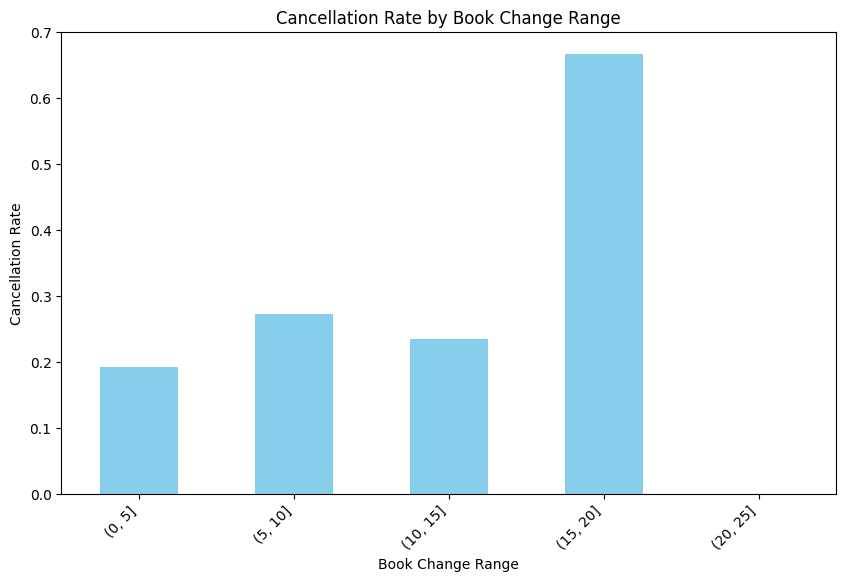

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung cancellation rate berdasarkan range lead time
book_change_bins = [0, 5, 10, 15, 20, 25]
df_parameter['book_change_range'] = pd.cut(df_parameter['booking_changes'], bins=book_change_bins)

all_bookings = df_parameter[['is_canceled', 'book_change_range']].copy()
canceled_bookings = df_parameter[df_parameter['is_canceled'] == 1]
canceled_by_changes = canceled_bookings.groupby('book_change_range')['is_canceled'].sum()
total_by_changes = all_bookings.groupby('book_change_range')['is_canceled'].count()
cancellation_rate_by_changes = canceled_by_changes / total_by_changes
print(cancellation_rate_by_changes*100)

# Plotting the cancellation rate
plt.figure(figsize=(10, 6))
cancellation_rate_by_changes.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Book Change Range')
plt.xlabel('Book Change Range')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

**Catatan:** NaN menandakan tidak dilakukan pembatalan pada transaksi yang diubah sebanyak value tersebut.

Kasus **pembatalan transaksi lebih banyak ditemukan pada range lead_time (600 - 800 days)** sehingga menandakan bahwa **lead_time yang singkat** pada kasus pembatalan booking berarti transaksi akan **lebih minim untuk dibatalkan.**

In [ ]:
canceled_by_changes

book_change_range
(0, 5]      3004
(5, 10]       33
(10, 15]       4
(15, 20]       4
(20, 25]       0
Name: is_canceled, dtype: int64

In [ ]:
total_by_changes

book_change_range
(0, 5]      15597
(5, 10]       121
(10, 15]       17
(15, 20]        6
(20, 25]        1
Name: is_canceled, dtype: int64

In [ ]:
# Total Cancellation Rate sebelum improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_cancellation_rate = canceled_bookings/df_parameter['is_canceled'].count()*100
print(f'Cancellation Rate Before Improvement: {total_cancellation_rate:.2f}%')

Cancellation Rate Before Improvement: 27.58%


In [ ]:
numbers_of_values = 0.25 * changed_bookings.count()
numbers_of_values

5940.25

In [ ]:
# Total Cancellation Rate setelah improvement
canceled_bookings = (df_parameter[df_parameter['is_canceled'] == 1]['is_canceled'].count())
total_canceled_bookings = canceled_bookings - numbers_of_values

total_cancellation_rate_changes = total_canceled_bookings/(df_parameter['is_canceled'].count() + numbers_of_values)*100

print(f'Cancellation Rate After Improvement: {total_cancellation_rate_changes:.2f}%')

Cancellation Rate After Improvement: 19.35%


Pada informasi diatas, ditemukan bahwa **Cancellation Rate** yang dipengaruhi oleh Booking Changes **sebesar 24.04%**.

Dengan asumsi 5% dari transaksi yang dilakukan perubahan pemesanan secara rata mengalami penurunan pembatalan, maka terjadi **peningkatan pada Total Cancellation Rate** yang sebelumnya 27.58% **menurun menjadi 19.35%**.

# Result

In [ ]:
sum_final_cancellation_rate = total_cancellation_rate_room_type + total_cancellation_rate_distribution_channel + total_cancellation_rate_market + total_cancellation_rate_customer_type + total_cancellation_rate_lead_time + total_cancellation_rate_changes
number_of_metrics = 6

final_cancellation_rate = sum_final_cancellation_rate / number_of_metrics
print(f'Cancellation Rate Obtained: {final_cancellation_rate:.2f}%')

Cancellation Rate Obtained: 22.40%


Apabila kita mencoba untuk melakukan **peringkasan pada keseluruhan aspek** dari metriks yang telah kita tentukan, maka akan memperoleh **Cancellation Rate sebesar 22.40%** yang mana hal ini masih di bawah dari ekspektasi yaitu ±20%. **bold text**

In [ ]:
sum_final_cancellation_rate = total_cancellation_rate_room_type + total_cancellation_rate_distribution_channel + total_cancellation_rate_market + total_cancellation_rate_customer_type + total_cancellation_rate_changes
number_of_metrics = 5

final_cancellation_rate = sum_final_cancellation_rate / number_of_metrics
print(f'Cancellation Rate Obtained: {final_cancellation_rate:.2f}%')

Cancellation Rate Obtained: 21.40%


Selanjutnya, apabila kita mencoba untuk melakukan **peringkasan pada keseluruhan aspek dengan membuang parameter lead_time** dari metriks yang telah kita tentukan, maka akan memperoleh **Cancellation Rate sebesar 21.40%** karena *improvement* pada transaksi lead_time tidak berpengaruh secara signifikan terhadap pembatalan dan memberikan kenaikan dari tingkat pembatalan sebelumnya meskipun **masih dibawah ekspektasi.**

In [ ]:
sum_final_cancellation_rate = total_cancellation_rate_distribution_channel + total_cancellation_rate_market + total_cancellation_rate_customer_type + total_cancellation_rate_changes
number_of_metrics = 4

final_cancellation_rate = sum_final_cancellation_rate / number_of_metrics
print(f'Cancellation Rate Obtained: {final_cancellation_rate:.2f}%')

Cancellation Rate Obtained: 20.37%


Selanjutnya, apabila kita mencoba untuk melakukan **peringkasan pada keseluruhan aspek dengan membuang parameter lead_time dan is_room_type_same** dari metriks yang telah kita tentukan, maka akan memperoleh **Cancellation Rate sebesar 20.37%** karena *improvement* pada transaksi lead_time dan is_room_type_same tidak berpengaruh secara signifikan terhadap pembatalan dan memberikan kenaikan dari **tingkat pembatalan sesuai ekspektasi.**

In [ ]:
# Total Cancellation Rate setelah improvement

canceled_bookings_after = (final_cancellation_rate/100) * encode_df['is_canceled'].count()
print(f'Total Numbers of Canceled Bookings Obtained: {canceled_bookings_after:.0f}')

Total Numbers of Canceled Bookings Obtained: 17553


In [ ]:
percentage_improvement = (canceled_bookings - canceled_bookings_after)/canceled_bookings*100
print(f'Percentage of Canceled Bookings Improved: {percentage_improvement:.2f}%')

Percentage of Canceled Bookings Improved: 26.13%
